In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei']  #解决中文显示乱码问题
plt.rcParams['axes.unicode_minus']=False
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.datasets import make_regression
from sklearn import tree

Python编程题1：药物适用性研究

大批患有同种疾病的不同病人，服用五种药物中的一种（Drug，分为Drug A、Drug B、Drug C、Drug X、Drug Y）之后都取得了同样的治疗效果。数据（文件名为药物研究.txt）是随机挑选的部分病人服用药物前的基本临床检查数据，包括：
+ 血压（BP：高血压High、正常Normal、低血压Low）
+ 胆固醇（Cholesterol：正常Normal、高胆固醇High）
+ 血液中钠元素（Na）和钾元素（K）含量
+ 病人年龄（Age）
+ 性别（Sex：男M和女F）

研究目标：发现以往药物处方适用的规律，给出不同临床特征病人更适合服用哪种药物的推荐建议和理由，从而为医生开具处方提供参考

提示：从医学角度看，计算微量元素钠与钾的比值更有意义(略去Na和K)

In [11]:
data = pd.read_csv("药物研究.txt")         # 读取数据
data["Na/K"] = data["Na"]/data["K"]       # 计算微量元素钠与钾的比值
data.isnull().sum()                       # 统计缺失值

Age            0
Sex            0
BP             0
Cholesterol    0
Na             0
K              0
Drug           0
Na/K           0
dtype: int64

In [12]:
data.head()                               # 展示数据

,Age,Sex,BP,Cholesterol,Na,K,Drug,Na/K
0,23,F,HIGH,HIGH,0.792535,0.031258,drugY,25.354629
1,47,M,LOW,HIGH,0.739309,0.056468,drugC,13.092530
2,47,M,LOW,HIGH,0.697269,0.068944,drugC,10.113556
3,28,F,NORMAL,HIGH,0.563682,0.072289,drugX,7.797618
4,61,F,LOW,HIGH,0.559294,0.030998,drugY,18.042906


In [20]:
# 转换类别字符串
data['Sex'] = data['Sex'].map({"F":'0', 'M':'1'})
data['BP'] = data['BP'].map({'LOW':'0', 'NORMAL':'1', 'HIGH':'2'})
data['Cholesterol'] = data['Cholesterol'].map({'NORMAL':'0', 'HIGH':'1'})
data['Drug'] = data['Drug'].map({'drugA':'0', 'drugB':'1', 'drugC':'2', 'drugX':'3', 'drugY':'4'})

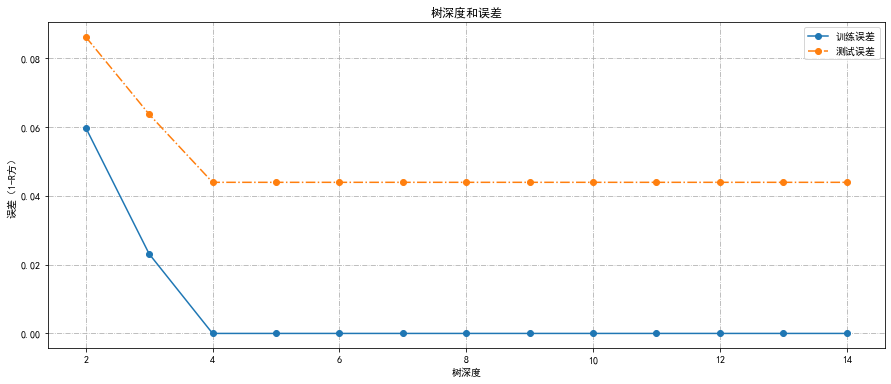

In [27]:
X=data[['Age','Sex','BP','Cholesterol','Na/K']]
Y=data['Drug']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.70, random_state=123)
trainErr=[]
testErr=[]
CVErr=[]
for k in np.arange(2,15):
    modelDTC = tree.DecisionTreeRegressor(max_depth=k,random_state=123)
    modelDTC.fit(X_train,Y_train)
    trainErr.append(1-modelDTC.score(X_train,Y_train))
    testErr.append(1-modelDTC.score(X_test,Y_test))

fig = plt.figure(figsize=(15,6))
plt.grid(True, linestyle='-.')
plt.plot(np.arange(2,15),trainErr,label="训练误差",marker='o',linestyle='-')
plt.plot(np.arange(2,15),testErr,label="测试误差",marker='o',linestyle='-.')
plt.xlabel("树深度")
plt.ylabel("误差（1-R方）")
plt.title('树深度和误差')
plt.legend()

In [31]:
# 于是选择树深度为4
modelDTC = tree.DecisionTreeRegressor(max_depth=4,random_state=123)
modelDTC.fit(X_train,Y_train)
print(tree.export_text(modelDTC))

|--- feature_4 <= 14.19
|   |--- feature_2 <= 1.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- feature_3 <= 0.50
|   |   |   |   |--- value: [3.00]
|   |   |   |--- feature_3 >  0.50
|   |   |   |   |--- value: [2.00]
|   |   |--- feature_2 >  0.50
|   |   |   |--- value: [3.00]
|   |--- feature_2 >  1.50
|   |   |--- feature_0 <= 49.50
|   |   |   |--- value: [0.00]
|   |   |--- feature_0 >  49.50
|   |   |   |--- value: [1.00]
|--- feature_4 >  14.19
|   |--- feature_4 <= 14.83
|   |   |--- value: [3.00]
|   |--- feature_4 >  14.83
|   |   |--- value: [4.00]



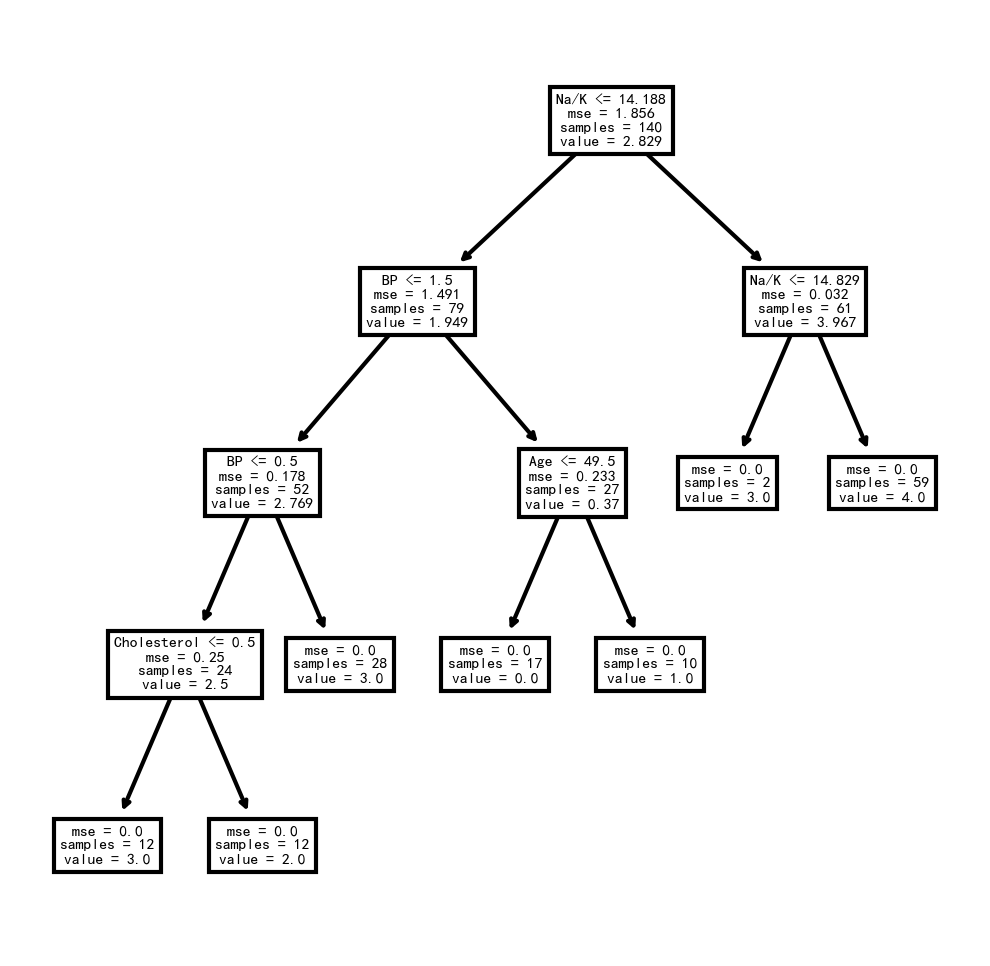

In [39]:
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
_ = tree.plot_tree(modelDTC, feature_names=['Age','Sex','BP','Cholesterol','Na/K']) #  决策树可视化

发现以往药物处方适用的规律，给出不同临床特征病人更适合服用哪种药物的推荐建议和理由
> 由决策树，
>+ DrugA : Age<49.5, BP>1.5, Na/K <=14.188, DrugA 适合钠钾比小于14.188、年龄在49.5以下、高血压病人的使用。
>+ DrugB : Age>49.5, BP>1.5, Na/K <=14.188, DrugB 适合钠钾比小于14.188、年龄在49.5以上、高血压病人的使用。
>+ DrugC : Age<49.5, BP<0.5, Na/K <=14.188, Cholesterol>0.5, DrugC适合钠钾比小于14.188、年龄在49.5以下、低血压、胆固醇正常的病人的使用。
>+ DrugY : Na/K>14.829, DrugB 适合钠钾比大于14.829的病人的使用。
>+ DrugX : 其他, DrugX 适合其他情况的病人使用。


Python编程题2：泰坦尼克号沉船事件的历史事件分析
+ 在这次海难事件中什么类型的人有较高的生存几率？
+ “women and children first”？

In [89]:
data = pd.read_csv('泰坦尼克数据/Titanic.csv') # 加载数据
data.isnull().sum()                          # 统计缺失值

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [92]:
# Cabin缺失太多，不用了；Age,Embarked去掉缺失值
data.drop('Cabin',axis=1, inplace=True)
data.dropna(inplace=True)
data.head()                                  # 展示数据

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [94]:
# 转换类别字符串
data['Sex'] = data['Sex'].map({"female":'0', 'male':'1'})
data['Embarked'] = data['Embarked'].map({'C':'0', 'Q':'1', 'S':'2'})

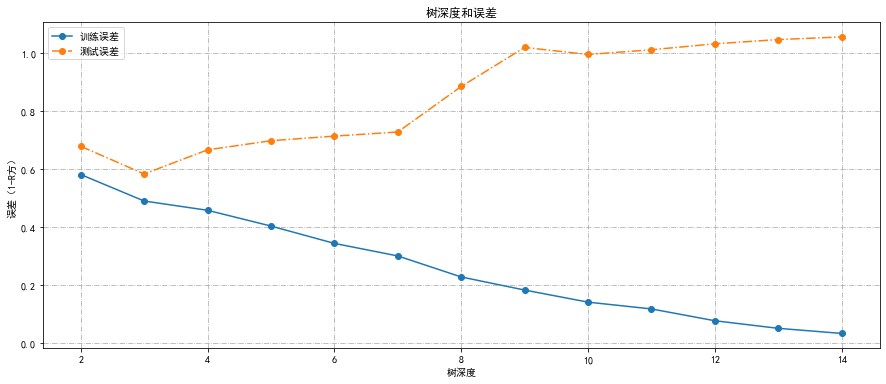

In [102]:
X=data[['Pclass','Sex','Age','SibSp','Parch', 'Fare', 'Embarked']]
Y=data['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,train_size=0.80, random_state=126)
trainErr=[]
testErr=[]
CVErr=[]
for k in np.arange(2,15):
    modelDTC = tree.DecisionTreeRegressor(max_depth=k,random_state=123)
    modelDTC.fit(X_train,Y_train)
    trainErr.append(1-modelDTC.score(X_train,Y_train))
    testErr.append(1-modelDTC.score(X_test,Y_test))

fig = plt.figure(figsize=(15,6))
plt.grid(True, linestyle='-.')
plt.plot(np.arange(2,15),trainErr,label="训练误差",marker='o',linestyle='-')
plt.plot(np.arange(2,15),testErr,label="测试误差",marker='o',linestyle='-.')
plt.xlabel("树深度")
plt.ylabel("误差（1-R方）")
plt.title('树深度和误差')
plt.legend()

|--- feature_1 <= 0.50
|   |--- feature_0 <= 2.50
|   |   |--- feature_2 <= 2.50
|   |   |   |--- value: [0.00]
|   |   |--- feature_2 >  2.50
|   |   |   |--- value: [0.97]
|   |--- feature_0 >  2.50
|   |   |--- feature_5 <= 20.80
|   |   |   |--- value: [0.54]
|   |   |--- feature_5 >  20.80
|   |   |   |--- value: [0.12]
|--- feature_1 >  0.50
|   |--- feature_2 <= 13.00
|   |   |--- feature_3 <= 2.50
|   |   |   |--- value: [0.94]
|   |   |--- feature_3 >  2.50
|   |   |   |--- value: [0.09]
|   |--- feature_2 >  13.00
|   |   |--- feature_0 <= 1.50
|   |   |   |--- value: [0.39]
|   |   |--- feature_0 >  1.50
|   |   |   |--- value: [0.12]



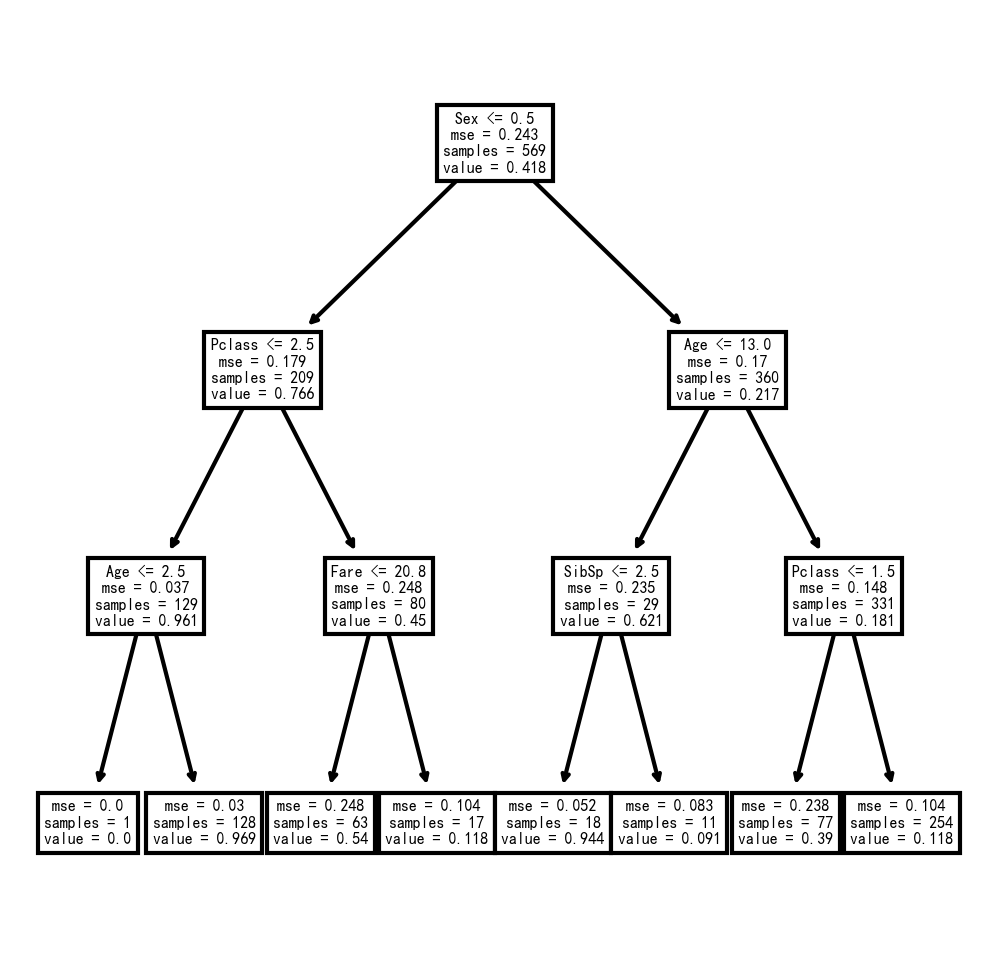

In [103]:
# 树深度选择3
modelDTC = tree.DecisionTreeRegressor(max_depth=3,random_state=123)
modelDTC.fit(X_train,Y_train)
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
print(tree.export_text(modelDTC))
_ = tree.plot_tree(modelDTC, feature_names=['Pclass','Sex','Age','SibSp','Parch', 'Fare', 'Embarked']) #  决策树可视化

存活率较高的特征有：
+ 女性, 1、2阶层: 训练集存活率96.1%;
+ 年龄13岁以下, 船上的兄弟姐妹或配偶个数3人以下：训练集存活率94.4%；
  
所以我认为可以认为“women and children first”.